# Project: Investigate the TMDb movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Preliminary analysis was performed on The Movie Database (TMDb) data. This data set has information on roughly 10,000 movies, and contains the following fields:

- id: identification number
- imdb_id: identification number from IMBD
- popularity: rating for how popular the movie is
- budget: what the movie cost to produce
- revenue: what the movie grossed
- original_title: title of the movie
- cast: actors featured in the movie
- homepage: web page URL
- director: individual who directed the movie
- tagline: movie tagline or catchphrase
- keywords: terms and phrases used to identify the movie
- overview: brief synopsis of the movie
- runtime: length of the movie
- genres: movie genre
- production_companies: companies that produced the movie
- release_date: full date of when the movie entered theaters
- vote_count: number of movie ratings
- vote_average: average movie rating
- release_year: year the movie entered theaters
- budget_adj: budget adjusted to 2010 dollars to account for inflation
- revenue_adj: revenue adjusted to 2010 dollars to account for inflation

Several questions will be in the subsequent analysis. In particular, movie profits, the potential relationship between budget and movie rating, and popular directors will be investigated. Descriptive statistics and basic visualizations will be used to better understand the relationships between these variables.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [34]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#### Notes
> Budget and revenue do not have a unit. This analysis will assume that these are in dollar values.

In [35]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Notes
>Runtime, budget, and revenue all have zero as a minimum value. This will affect the analysis if left in the dataset since this value is likely an incorrect.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

#### Notes
>Budget_adj and revenue_adj should be integers instead of floats. Columns not being used in the subsequent analysis will need to be dropped.

In [37]:
# view missing value count
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

#### Notes
>Several columns are missing data. Many of these columns will be dropped and therefore do not need to be converted.

In [38]:
sum(df.duplicated())

1

#### Notes
>We will need to drop this duplicate column.

### Data Cleaning

Several steps will be performed to clean this data and prepare it for analysis.

1) Columns with missing data should be dropped.

2) Columns not being used will be dropped.
- id
- imdb_id
- cast
- homepage
- tagline
- keywords
- overview
- runtime
- genres
- production companies
- release date
- vote count
- vote average
- budget_adj
- revenue_adj

3) Duplicate row will be dropped.

#### Action Item 1: drop columns with missing data

In [39]:
# drop rows with any null values
df.dropna(inplace=True)

In [40]:
# verify if any columns have null values, should print False
df.isnull().sum().any()

False

#### Action Item 2: Drop unused columns

In [41]:
# drop unused columns
# make list of columns to be deleted
delete_me=['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview', 'genres', 'production_companies', 'release_date', 'vote_count', 'budget_adj', 'revenue_adj']

#delete the columns
df= df.drop(delete_me,1)

#preview the new dataset
df.head()


,popularity,budget,revenue,original_title,director,runtime,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6.5,2015
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,7.1,2015
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,6.3,2015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,7.5,2015
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,7.3,2015


#### Action Item 3: Drop duplicate rows

In [42]:
#drop duplicated values
df.drop_duplicates(inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: What were the top 10 most profitable movies?

Research Question 0.5: Is there a visible relationship between revenue and budget?

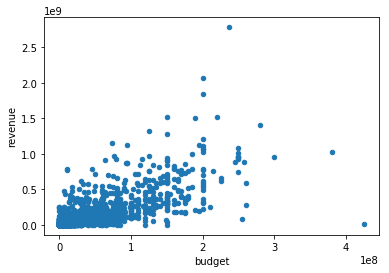

In [43]:
df.plot(x='budget', y='revenue', kind='scatter');

#### Notes
> There does not appear to be a strong relationship between revenue and budget. There is a potential positive correlation between the two variables, but without statistical analysis or an R^2 value, no specific conclusions can be drawn.

Back to Research Question 1!

In [44]:
# need to create a 'profits' column
df['profit'] = df['revenue'] - df['budget']
df.head()

,popularity,budget,revenue,original_title,director,runtime,vote_average,release_year,profit
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,6.5,2015,1363528810
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,7.1,2015,228436354
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,6.3,2015,185238201
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,7.5,2015,1868178225
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,7.3,2015,1316249360


In [45]:
def top_profits(Dataframe,column):
    df_sort = pd.DataFrame(Dataframe[column].sort_values(ascending=False))[:10]
    df_sort['original_title'] = df['original_title']
    return df_sort

In [46]:
#call profit function
top_profits(df,'profit')

,profit,original_title
1386,2544505847,Avatar
3,1868178225,Star Wars: The Force Awakens
5231,1645034188,Titanic
0,1363528810,Jurassic World
4,1316249360,Furious 7
4361,1299557910,The Avengers
3374,1202817822,Harry Potter and the Deathly Hallows: Part 2
14,1125035767,Avengers: Age of Ultron
5422,1124219009,Frozen
8,1082730962,Minions


### Research Question 1.5: What were the top 10 most profitable movies in 2005?

In [47]:
# filter for movies released in 2005
df_2005 = df.query('release_year == 2005')
df_2005.head()

,popularity,budget,revenue,original_title,director,runtime,vote_average,release_year,profit
6190,5.939927,150000000,895921036,Harry Potter and the Goblet of Fire,Mike Newell,157,7.3,2005,745921036
6191,5.400826,150000000,374218673,Batman Begins,Christopher Nolan,140,7.3,2005,224218673
6193,3.617106,54000000,132511035,V for Vendetta,James McTeigue,132,7.6,2005,78511035
6194,3.520836,40000000,158733820,Sin City,Robert Rodriguez|Frank Miller|Quentin Tarantino,124,7.1,2005,118733820
6196,3.457537,113000000,850000000,Star Wars: Episode III - Revenge of the Sith,George Lucas,140,7.0,2005,737000000


In [48]:
#call profit function for 2005 movies
top_profits(df_2005,'profit')

,profit,original_title
6190,745921036,Harry Potter and the Goblet of Fire
6196,737000000,Star Wars: Episode III - Revenge of the Sith
6191,224218673,Batman Begins
6208,164432665,Chicken Little
6219,164043761,Brokeback Mountain
6232,162452832,The Curse of the Were-Rabbit
6201,130427240,Constantine
6194,118733820,Sin City
6280,102026112,Fun with Dick and Jane
6218,93147947,Pride & Prejudice


### Research Question 2: Do movies with a higher budget receive higher movie ratings?

In [49]:
# get the median budget
df['budget'].median()

15000000.0

In [50]:
# select samples with budget less than the median
low_budget = df.query('budget < 15000000')

# select samples with budget greater than or equal to the median
high_budget = df.query('budget >= 15000000')

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_budget['budget'].count() + high_budget['budget'].count() # should be True

True

In [51]:
# get mean vote average/movie rating for the low budget and high budget groups
low_mean_rating = low_budget.vote_average.mean()
high_mean_rating = high_budget.vote_average.mean()

In [52]:
low_mean_rating, high_mean_rating

(6.1096676737160118, 6.2471471471471469)

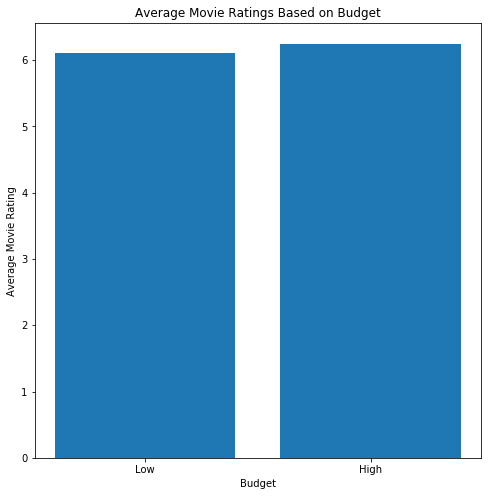

In [53]:
# graph these averages
locations = [1, 2]
heights = [low_mean_rating, high_mean_rating]
labels = ['Low', 'High']
plt.subplots(figsize=(8, 8))
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Movie Ratings Based on Budget')
plt.xlabel('Budget')
plt.ylabel('Average Movie Rating');

#### Notes
>The average ratings for the low budget and the high budget group do not appear to be significantly different.

### Research Question 3: Which directors produced the most popular movies in 2011?

In [54]:
# filter for 2011 movies
df_director = df.query('release_year == 2011')

In [55]:
# group on director names and then get their popularity rating
directors = df_director.groupby('director').mean().popularity
directors.head(10)

director
Alan Brown                  0.420010
Alejandro BruguÃ©s          0.455840
Alex Chandon                0.068431
Alex Gregory|Peter Huyck    0.682356
Alex Kendrick               0.487945
Alex Ranarivelo             0.483517
Alexander Payne             0.808336
Alister Grierson            0.587045
Andrea Arnold               0.414629
Andrew Haigh                0.243777
Name: popularity, dtype: float64

In [56]:
# sort by popularity ratings in descending order
directors_sorted = directors.sort_values(ascending=False)
directors_sorted.head(10)

director
Joe Johnston       7.959228
David Yates        5.711315
Rob Marshall       4.955130
Rupert Wyatt       4.504530
Kenneth Branagh    4.123520
Andrew Niccol      3.596188
Patrick Lussier    3.355611
Simon West         3.186679
Duncan Jones       2.994474
Brad Bird          2.952740
Name: popularity, dtype: float64

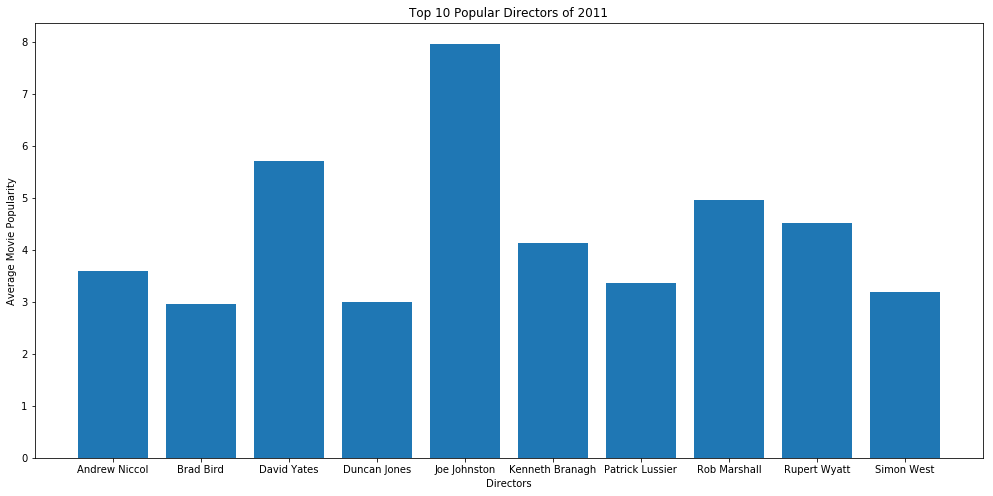

In [57]:
plt.subplots(figsize=(17,8))
plt.bar(directors_sorted.index[:10], directors_sorted[:10])
plt.title('Top 10 Popular Directors of 2011')
plt.xlabel('Directors')
plt.ylabel('Average Movie Popularity');

#### Notes
> Joe Johnston is the most popular director in 2011 ranking at 8.0. David Yates is the second most popular with an average movie popularity of 5.7.

<a id='conclusions'></a>
## Conclusions

#### Research Question 1: What were the top 10 most profitable movies?

The most profitable movie, Avatar, is the only movie in this dataset that grossed over 2 billion dollars.

- 1) Avatar: 2.5 billion
- 2) Star Wars The Force Awakens: 1.7 billion
- 3) Titanic: 1.6 billion
- 4) Jurassic World: 1.4 billion
- 5) Furious 7: 1.3 billion
- 6) The Avengers: 1.3 billion
- 7) Harry Potter and the Deathly Hallows Part 2: 1.2 billion
- 8) Avengers Age of Ultron: 1.1 billion
- 9) Frozen: 1.1 billion
- 10) Minions: 1.1 billion

>Limitations: Profits were not provided but were calculated by subtracting the budget from the revenue. Therefore, these are assumed profits since it is possible that there are additional taxes or fees that are not included in the budget field. Since the revenue and budget columns do not have an assigned unit, it is possible that these are not all reported in dollars.

#### Research Question 1.5: What are the top 10 most profitable movies in 2005?

The most profitable movie in 2005 was Harry Potty and the Goblet of Fire with 745 million dollars. Harry Potter and Star Wars: Episode III were the only two movies in 2005 to produce over 700 million dollars in profits.

- 1) Harry Potter and the Goblet of Fire: 745 million
- 2) Star Wars: Episode III - Revenge of the Sith: 737 million
- 3) Batman Begins: 224 million
- 4) Chicken Little: 164 million
- 5) Brokeback Mountain: 164 million
- 6) The Curse of the Were-Rabbit: 162 million
- 7) Constantine: 130 million
- 8) Sin City: 119 million
- 9) Fun with Dick and Jane: 102 million
- 10) Pride & Prejudice: 93 million

>Limitations: Same limitations as in Research Question 1.

#### Research Question 2: Do movies with a higher budget receive higher movie ratings?

The median budget is 15 million dollars. Movies were divided into 'higher budget' and 'lower budget' groups. The mean rating for the lower budget movies is 6.1, and the mean rating of the higher budget movies is 6.2. These averages do not appear to be significantly different, and therefore it does not seem that budget is related to movie ratings.


>Limitations: There are no missing budget or vote_average values. However, the minimum value for budget is 0 dollars which is likely a typo and would affect the mean for the lower budget movies.

#### Research Question 3: Which directors produced the most popular movies in 2011?
By grouping the director's popularity ratings for 2011, it is possible to identify the top 10 most popular directors. Joe Johnston ranked the highest with a rating of 8.0. David Yates is the second most popular director in 2011 with a rating of 5.7.

>Limitations: There are no missing popularity values, but there are 44 null values for directors.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!


#### Credits:
- Udacity's Introduction to Data Analysis Case Studies
- Stack Overflow on passing a pandas dataframe into a function
- Pandas documentation for GroupBy

## OPTIONAL: Question for the reviewer
 
> **_N/A_**

In [58]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0